# Cardio Good Fitness Case Study - Descriptive Statistics
The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months. The data are stored in the CardioGoodFitness.csv file.

### The team identifies the following customer variables to study: 
  - product purchased, TM195, TM498, or TM798; 
  - gender; 
  - age, in years; 
  - education, in years; 
  - relationship status, single or partnered; 
  - annual household income ; 
  - average number of times the customer plans to use the treadmill each week; 
  - average number of miles the customer expects to walk/run each week; 
  - and self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.

### Perform descriptive analytics to create a customer profile for each CardioGood Fitness treadmill product line.

In [ ]:
# Load the necessary packages

import numpy as np
import pandas as pd

In [ ]:
# Load the Cardio Dataset

mydata = pd.read_csv('CardioGoodFitness.csv')

In [ ]:
mydata.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47

In [ ]:
mydata.describe(include="all")

Product         Age Gender   Education MaritalStatus       Usage  \
count      180  180.000000    180  180.000000           180  180.000000   
unique       3         NaN      2         NaN             2         NaN   
top      TM195         NaN   Male         NaN     Partnered         NaN   
freq        80         NaN    104         NaN           107         NaN   
mean       NaN   28.788889    NaN   15.572222           NaN    3.455556   
std        NaN    6.943498    NaN    1.617055           NaN    1.084797   
min        NaN   18.000000    NaN   12.000000           NaN    2.000000   
25%        NaN   24.000000    NaN   14.000000           NaN    3.000000   
50%        NaN   26.000000    NaN   16.000000           NaN    3.000000   
75%        NaN   33.000000    NaN   16.000000           NaN    4.000000   
max        NaN   50.000000    NaN   21.000000           NaN    7.000000   

           Fitness         Income       Miles  
count   180.000000     180.000000  180.000000  
unique         NaN            NaN         NaN  
top            NaN            NaN         NaN  
freq           NaN            NaN         NaN  
mean      3.311111   53719.577778  103.194444  
std       0.958869   16506.684226   51.863605  
min       1.000000   29562.000000   21.000000  
25%       3.000000   44058.750000   66.000000  
50%       3.000000   50596.500000   94.000000  
75%       4.000000   58668.000000  114.750000  
max       5.000000  104581.000000  360.000000

In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Product          180 non-null object
Age              180 non-null int64
Gender           180 non-null object
Education        180 non-null int64
MaritalStatus    180 non-null object
Usage            180 non-null int64
Fitness          180 non-null int64
Income           180 non-null int64
Miles            180 non-null int64
dtypes: int64(6), object(3)
memory usage: 12.7+ KB


#**Univariate Analysis**#

**Q1.** What are the various categories in which our data falls into?

**Ans.** Our data falls into 4 different categories as follows:

          1.Age
          2.Education
          3.Fitness
          4.Income.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

mydata.hist(figsize=(20,30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11501bac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11587e048>]], dtype=object)

#**Bivariate Analysis**#

**Q2**. What is the avarage age of male and female?

**Ans:** The average age of both male and female is same which is in between 26-28 years.

In [ ]:
import seaborn as sns

sns.boxplot(x="Gender", y="Age", data=mydata)

In [ ]:
pd.crosstab(mydata['Product'],mydata['Gender'] )

Gender   Female  Male
Product              
TM195        40    40
TM498        29    31
TM798         7    33

In [ ]:
pd.crosstab(mydata['Product'],mydata['MaritalStatus'] )

MaritalStatus  Partnered  Single
Product                         
TM195                 48      32
TM498                 36      24
TM798                 23      17

**Q3.** Does gender affects the sale of product?

**ANS.** Gender affects the sale of only certain products not all. Here, the sale of TM798 product is more for male whereas less for female where as the of the product TM195 is almost same for both the genders.

Hence, the sale depends on the design and requirment of the products for the gender.

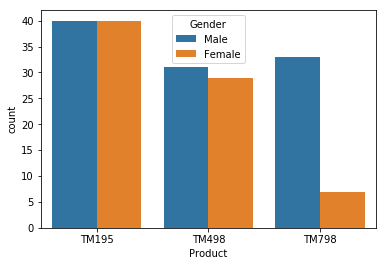

In [ ]:
sns.countplot(x="Product", hue="Gender", data=mydata)

#**Multivariate Analysis**#



In [ ]:
# Calculate results based on maritial status.
pd.pivot_table(mydata, index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'], aggfunc=len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

In [ ]:
pd.pivot_table(mydata,'Income', index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'])

MaritalStatus      Partnered        Single
Product Gender                            
TM195   Female  46153.777778  45742.384615
        Male    50028.000000  43265.842105
TM498   Female  49724.800000  48920.357143
        Male    49378.285714  47071.800000
TM798   Female  84972.250000  58516.000000
        Male    81431.368421  68216.428571

In [ ]:
pd.pivot_table(mydata,'Miles', index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'])

MaritalStatus    Partnered      Single
Product Gender                        
TM195   Female   74.925926   78.846154
        Male     80.190476   99.526316
TM498   Female   94.000000   80.214286
        Male     87.238095   91.100000
TM798   Female  215.000000  133.333333
        Male    176.315789  147.571429

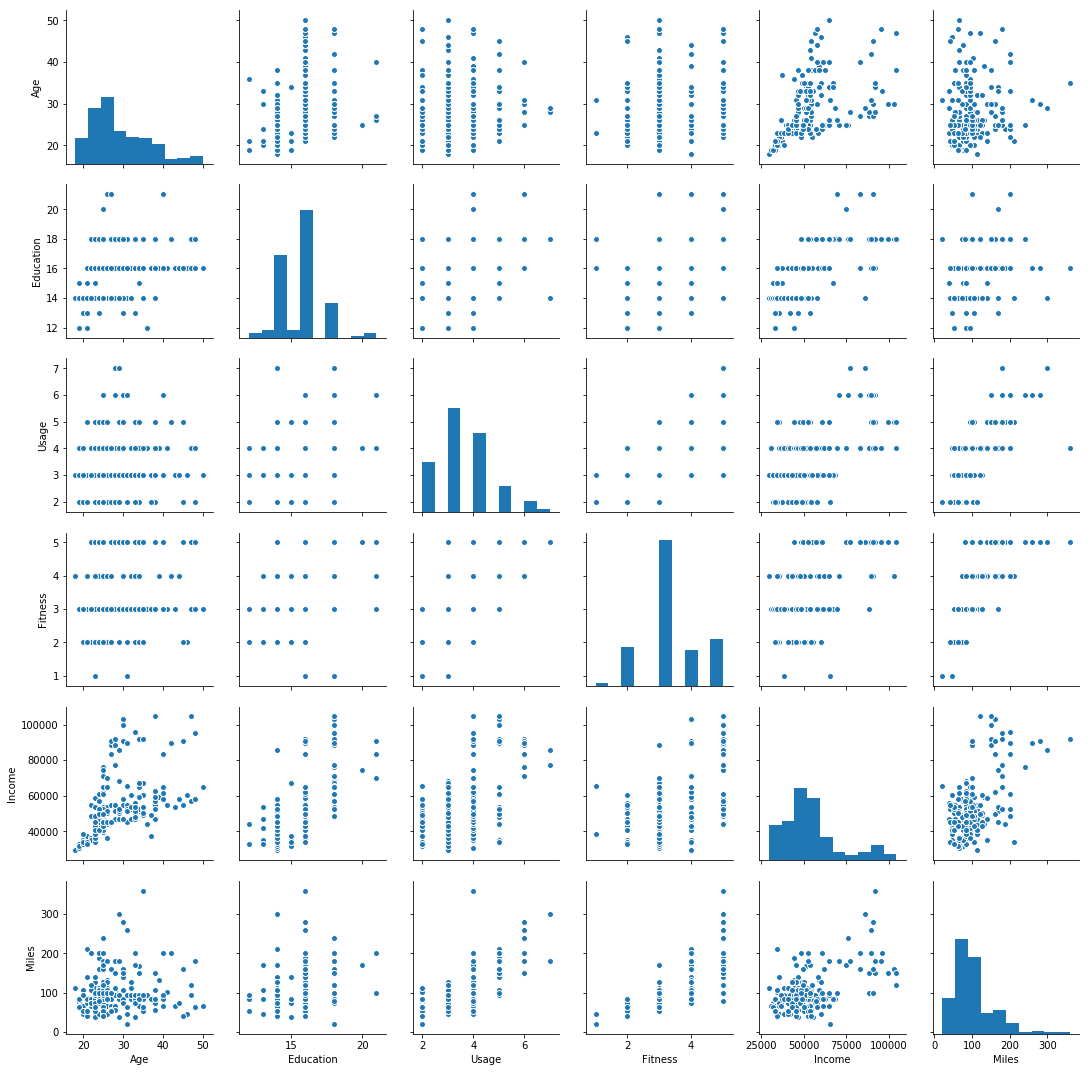

In [ ]:
#Show raltion between 2 same variables.
sns.pairplot(mydata)

In [ ]:
mydata['Age'].std()

6.9434981353997953

In [ ]:
mydata['Age'].mean()

28.788888888888888

**Q4.** Given a dataset, what is the average age of the sample?

**Ans** The average age of a sample is around 25 years.

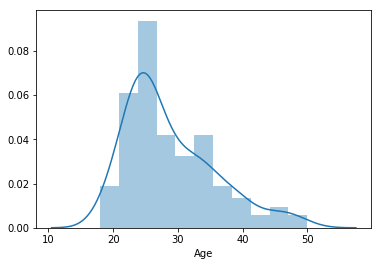

In [ ]:
# Apply distribution function.
sns.distplot(mydata['Age'])

**Q5.** What is the average age of male and female?

**Ans.** The average age of male is 28 years whereas of female is 24 years.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bade860>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a1bc68518>], dtype=object)

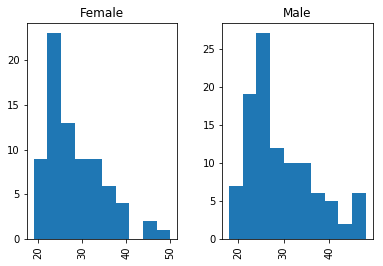

In [ ]:
mydata.hist(by='Gender',column = 'Age')

**Q6.** Is the average income of female is less than average income of male?

**Ans.** Yes.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bba48d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a1b9cedd8>], dtype=object)

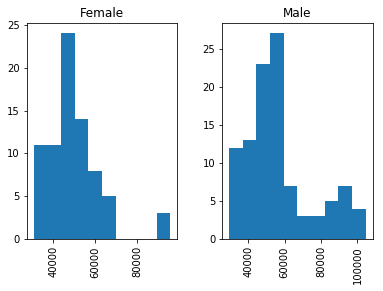

In [ ]:
mydata.hist(by='Gender',column = 'Income')

**Q7.** Does gender affects miles?

**Ans.** Yes. The average miles covered by male are greater than the female.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a5c3cc0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a19e4b828>], dtype=object)

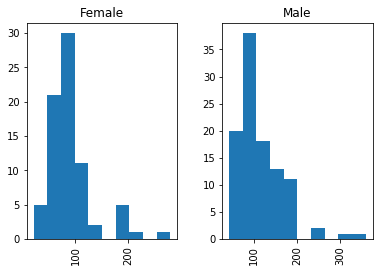

In [ ]:
mydata.hist(by='Gender',column = 'Miles')

**Q8.** What is the relationship of miles and product?

**Ans** The average miles coverd by male are greater than the average miles coverd by the female. Here, product TM195 covers more miles than product TM498.
hence it is prefered more by males.

In [ ]:
mydata.hist(by='Product',column = 'Miles', figsize=(20,30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bfdd668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1c15e710>]], dtype=object)

In [ ]:
corr = mydata.corr()
corr

Age  Education     Usage   Fitness    Income     Miles
Age        1.000000   0.280496  0.015064  0.061105  0.513414  0.036618
Education  0.280496   1.000000  0.395155  0.410581  0.625827  0.307284
Usage      0.015064   0.395155  1.000000  0.668606  0.519537  0.759130
Fitness    0.061105   0.410581  0.668606  1.000000  0.535005  0.785702
Income     0.513414   0.625827  0.519537  0.535005  1.000000  0.543473
Miles      0.036618   0.307284  0.759130  0.785702  0.543473  1.000000

**Q9.** What can we interpret from the below heatmap?

**Ans.** Here, the highest co-relation is in between fitness and miles, so we can interpret that the more miles a person covers, the more fit he/she is.

In [ ]:
sns.heatmap(corr, annot=True)

In [ ]:
# Simple Linear Regression


#Load function from sklearn
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

y = mydata['Miles']
x = mydata[['Usage','Fitness']]

# Train the model using the training sets
regr.fit(x,y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
regr.coef_

array([ 20.21486334,  27.20649954])

In [ ]:
regr.intercept_

-56.742881784648617

In [ ]:
# MilesPredicted = -56.74 + 20.21*Usage + 27.20*Fitness

#**CONCLUSION**#

1. The maritial status of male and female affects the sale of product depending on the type of product.
2. People with age 25 mostly use the product.
3. Miles and average income of gender may affect the product sale.
4. Male covers more miles than female.
5. The more miles a person covers, the more fit he/she is.